General Information

Download Libraries and Data

In [621]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_profiling as pp
%matplotlib inline

In [622]:
import category_encoders as ce

In [623]:
df = pd.read_excel('Child Need.xlsx')

Data Overview

In [624]:
df.head()

,Housheold ID,Electricity connected to dwelling,Toilet facility,Privacy of toilet facility,Food supply for household members,Supply of basic necessities on clothing and housing for household members,Household durables: refrigerator,Household durables: sewing machine,Sex of RSI respondent,Age of RSI respondent,...,Usually eat together with other household members,Access to radio,Access to television,Access to telephone,Access to internet,Wealth quintiles,access to improved water source,Access to improved sanitation,Current school attendance for RSI respondent,Quintile of depression index for RSI respondent
0,1001_1309,No,Pit latrine with slab,Shared,Just enough,Just enough,No,No,Female,17.0,...,No,Never,Never,Never,Never,High wealth,No,No,Not attending school,Highest depressed
1,1002_1374,No,"Ventilated, build in latrine",Shared,Less than enough,NaN,No,Has,Male,15.0,...,No,Regularly,Regularly,Regularly,Never,Medium wealth,Yes,Yes,Attending school,High depressed
2,1003_1326,Yes,Modern water closet,Private,Just enough,Less than enough,Has,No,Male,17.0,...,Yes,Sometimes,Sometimes,Regularly,Sometimes,Highest wealth,No,Yes,Attending school,Medium depressed
3,1004_1324,No,Pit latrine with slab,Shared,Just enough,Less than enough,No,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Medium wealth,No,No,NaN,NaN
4,1005_1313,No,Pit latrine with slab,Shared,Less than enough,NaN,No,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Medium wealth,No,No,NaN,NaN


In [625]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df.columns

Index(['housheold_id', 'electricity_connected_to_dwelling', 'toilet_facility',
       'privacy_of_toilet_facility', 'food_supply_for_household_members',
       'supply_of_basic_necessities_on_clothing_and_housing_for_household_members',
       'household_durables:_refrigerator',
       'household_durables:_sewing_machine', 'sex_of_rsi_respondent',
       'age_of_rsi_respondent', 'work_in_household_after_8_pm_or_before_6_am',
       'access_to_text_books_for_classes',
       'access_to_materials_for_classes:_notebooks',
       'access_to_materials_for_classes:_pencils',
       'access_to_materials_for_classes:_pens',
       'access_to_materials_for_classes:_eraser',
       'access_to_materials_for_classes:_school_bag',
       'access_to_materials_for_classes:_school_uniform',
       'access_to_materials_for_classes:_shoes',
       'being_afraid_of_household_members', 'place_to_sleep',
       'being_allowed_to_leave_house_alone',
       'usually_eat_together_with_other_household_members'

In [626]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2078 entries, 0 to 2077
Data columns (total 32 columns):
housheold_id                                                                 2078 non-null object
electricity_connected_to_dwelling                                            2077 non-null object
toilet_facility                                                              2078 non-null object
privacy_of_toilet_facility                                                   1577 non-null object
food_supply_for_household_members                                            2076 non-null object
supply_of_basic_necessities_on_clothing_and_housing_for_household_members    702 non-null object
household_durables:_refrigerator                                             2078 non-null object
household_durables:_sewing_machine                                           2076 non-null object
sex_of_rsi_respondent                                                        1617 non-null object
age_of_rsi_r

In [627]:
df = df[pd.notnull(df['quintile_of_depression_index_for_rsi_respondent'])]
df['quintile_of_depression_index_for_rsi_respondent'].value_counts(dropna = False)

Lowest depressed     398
High depressed       284
Highest depressed    271
Medium depressed     265
Low depressed         89
Name: quintile_of_depression_index_for_rsi_respondent, dtype: int64

In [628]:
pp.ProfileReport(df)

Number of variables,33
Number of observations,1307
Total Missing (%),8.1%
Total size in memory,337.0 KiB
Average record size in memory,264.1 B
Numeric,2
Categorical,30
Boolean,0
Date,0
Text (Unique),1
Rejected,0


Data Preparation

In [631]:
df['current_school_attendance_for_rsi_respondent'].value_counts(dropna = False)

Attending school        1019
Not attending school     288
Name: current_school_attendance_for_rsi_respondent, dtype: int64

In [632]:
pd.crosstab(df['access_to_text_books_for_classes'], [df.current_school_attendance_for_rsi_respondent])

current_school_attendance_for_rsi_respondent,Attending school
access_to_text_books_for_classes,
Access to all books,280
Access to some books,593
Not access to any book,146


In [633]:
pd.crosstab(df['access_to_materials_for_classes:_pens'], [df.current_school_attendance_for_rsi_respondent])

current_school_attendance_for_rsi_respondent,Attending school
access_to_materials_for_classes:_pens,
Has,846
No,160


In [634]:
df1 =df[['access_to_text_books_for_classes', 'access_to_materials_for_classes:_notebooks', 'access_to_materials_for_classes:_pencils',
       'access_to_materials_for_classes:_pens',
       'access_to_materials_for_classes:_eraser',
       'access_to_materials_for_classes:_school_bag',
       'access_to_materials_for_classes:_school_uniform',
       'access_to_materials_for_classes:_shoes']]

In [635]:
for x in df1.columns:
    y = 'Not Enrolled'
    df[x] = df[x].fillna(y)

In [636]:
pd.crosstab(df['access_to_materials_for_classes:_pens'], [df.current_school_attendance_for_rsi_respondent])

current_school_attendance_for_rsi_respondent,Attending school,Not attending school
access_to_materials_for_classes:_pens,,
Has,846,0
No,160,0
Not Enrolled,13,288


In [637]:
for x in df.columns:
    if x == 'housheold_id':
        pass
    else:
        y = df[x].mode().iloc[0]
        df[x] = df[x].fillna(y)

In [638]:
df = df.drop(['supply_of_basic_necessities_on_clothing_and_housing_for_household_members', 'electricity_connected_to_dwelling'], axis=1)

In [639]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1307 entries, 0 to 2073
Data columns (total 30 columns):
housheold_id                                         1307 non-null object
toilet_facility                                      1307 non-null object
privacy_of_toilet_facility                           1307 non-null object
food_supply_for_household_members                    1307 non-null object
household_durables:_refrigerator                     1307 non-null object
household_durables:_sewing_machine                   1307 non-null object
sex_of_rsi_respondent                                1307 non-null object
age_of_rsi_respondent                                1307 non-null float64
work_in_household_after_8_pm_or_before_6_am          1307 non-null object
access_to_text_books_for_classes                     1307 non-null object
access_to_materials_for_classes:_notebooks           1307 non-null object
access_to_materials_for_classes:_pencils             1307 non-null object
acce

Feature Analysis

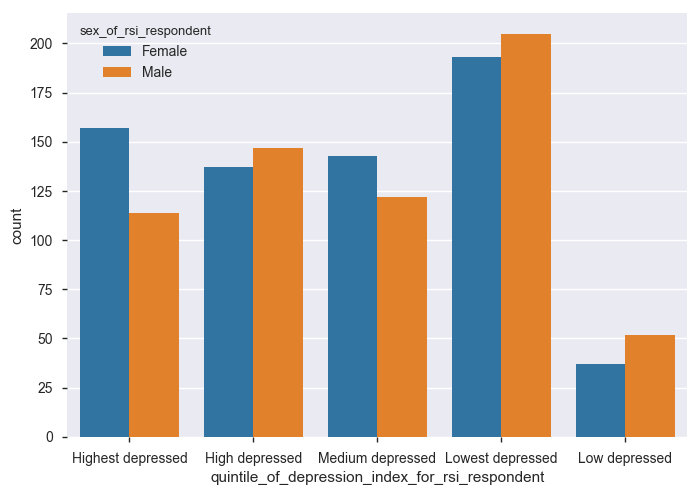

In [640]:
sns.countplot(x='quintile_of_depression_index_for_rsi_respondent', hue='sex_of_rsi_respondent', data = df)

In [641]:
pd.crosstab(df.toilet_facility, [df.quintile_of_depression_index_for_rsi_respondent], normalize='index').style.background_gradient(cmap='magma', low=.5, high=0).highlight_null('red')

quintile_of_depression_index_for_rsi_respondent,High depressed,Highest depressed,Low depressed,Lowest depressed,Medium depressed
toilet_facility,,,,,
Modern water closet,0.22619,0.184524,0.047619,0.357143,0.184524
No facilities/nature,0.197802,0.223443,0.0622711,0.282051,0.234432
Other,0.307692,0.230769,0,0.230769,0.230769
Pit latrine with slab,0.204,0.202,0.082,0.33,0.182
Pit latrine without slab/open pit,0.235537,0.219008,0.0702479,0.264463,0.210744
"Ventilated, build in latrine",0.261261,0.198198,0.0540541,0.261261,0.225225


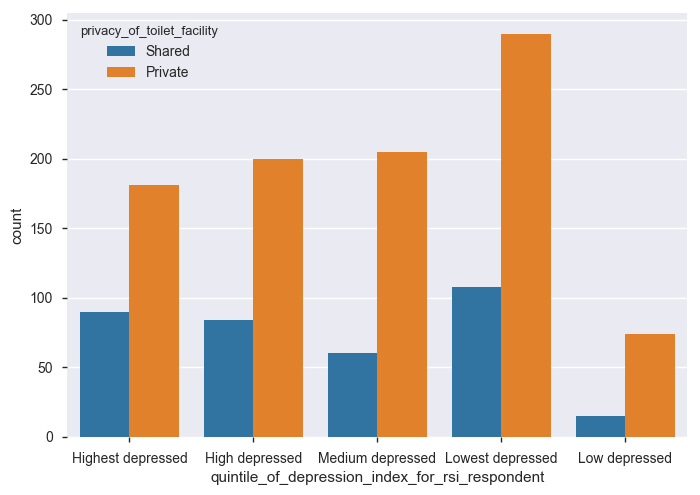

In [642]:
sns.countplot(x='quintile_of_depression_index_for_rsi_respondent', hue='privacy_of_toilet_facility', data = df)

In [643]:
pd.crosstab(df.quintile_of_depression_index_for_rsi_respondent, [df.wealth_quintiles, df.privacy_of_toilet_facility], normalize='index').style.background_gradient(cmap='magma', low=.5, high=0).highlight_null('red')

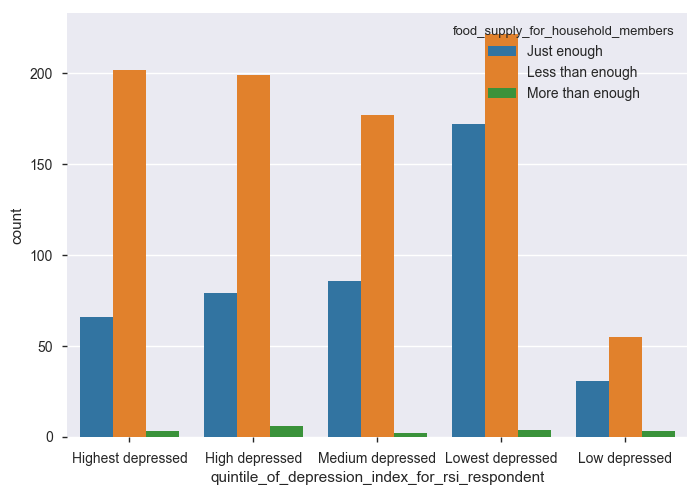

In [644]:
sns.countplot(x='quintile_of_depression_index_for_rsi_respondent', hue='food_supply_for_household_members', data = df)

In [645]:
pd.crosstab(df.quintile_of_depression_index_for_rsi_respondent, [df.wealth_quintiles, df.food_supply_for_household_members]).style.background_gradient(cmap='magma', low=.5, high=0).highlight_null('red')

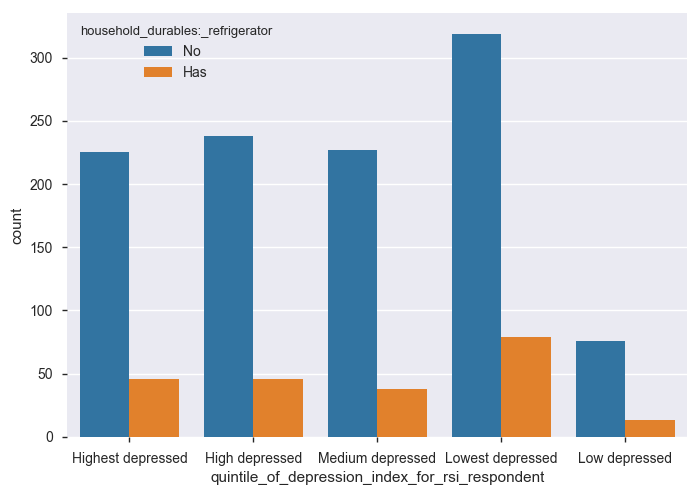

In [646]:
sns.countplot(x='quintile_of_depression_index_for_rsi_respondent', hue='household_durables:_refrigerator', data = df)

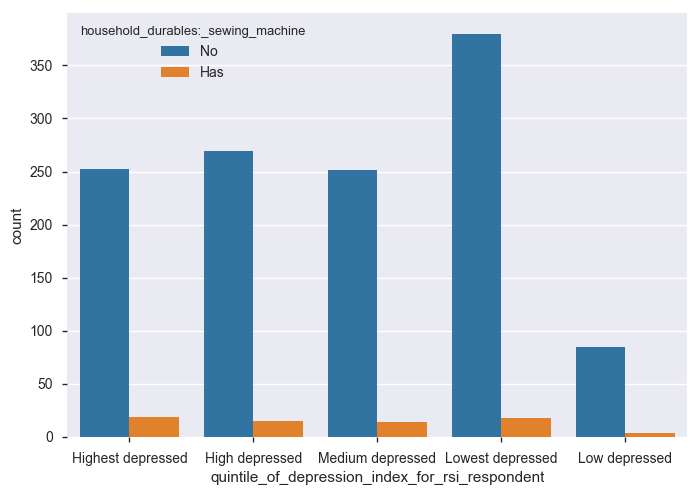

In [647]:
sns.countplot(x='quintile_of_depression_index_for_rsi_respondent', hue='household_durables:_sewing_machine', data = df)

In [648]:
pd.crosstab(df.age_of_rsi_respondent, [df.quintile_of_depression_index_for_rsi_respondent], normalize='index').style.background_gradient(cmap='magma', low=.5, high=0).highlight_null('red')

quintile_of_depression_index_for_rsi_respondent,High depressed,Highest depressed,Low depressed,Lowest depressed,Medium depressed
age_of_rsi_respondent,,,,,
8.0,0.20155,0.108527,0.0542636,0.379845,0.255814
9.0,0.136752,0.230769,0.0512821,0.358974,0.222222
10.0,0.188406,0.144928,0.057971,0.405797,0.202899
11.0,0.171717,0.161616,0.0909091,0.353535,0.222222
12.0,0.240876,0.175182,0.0729927,0.291971,0.218978
13.0,0.242188,0.179688,0.046875,0.34375,0.1875
14.0,0.222973,0.263514,0.0878378,0.263514,0.162162
15.0,0.235714,0.25,0.0714286,0.271429,0.171429
16.0,0.316176,0.25,0.0661765,0.205882,0.161765


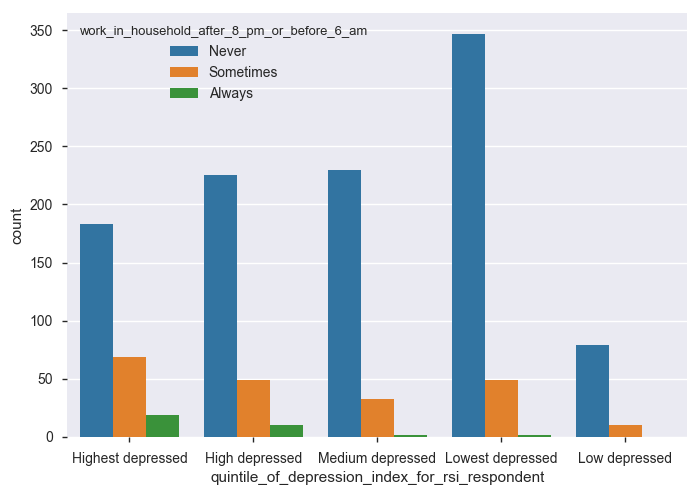

In [649]:
sns.countplot(x='quintile_of_depression_index_for_rsi_respondent', hue='work_in_household_after_8_pm_or_before_6_am', data = df)

In [650]:
pd.crosstab(df.work_in_household_after_8_pm_or_before_6_am, [df.quintile_of_depression_index_for_rsi_respondent], normalize='index').style.background_gradient(cmap='magma', low=.5, high=0).highlight_null('red')

quintile_of_depression_index_for_rsi_respondent,High depressed,Highest depressed,Low depressed,Lowest depressed,Medium depressed
work_in_household_after_8_pm_or_before_6_am,,,,,
Always,0.30303,0.575758,0,0.0606061,0.0606061
Never,0.211466,0.171992,0.0742481,0.326128,0.216165
Sometimes,0.233333,0.328571,0.047619,0.233333,0.157143


In [651]:
pd.crosstab(df.access_to_text_books_for_classes, [df.quintile_of_depression_index_for_rsi_respondent], normalize='index').style.background_gradient(cmap='magma', low=.5, high=0).highlight_null('red')

quintile_of_depression_index_for_rsi_respondent,High depressed,Highest depressed,Low depressed,Lowest depressed,Medium depressed
access_to_text_books_for_classes,,,,,
Access to all books,0.142857,0.121429,0.0785714,0.453571,0.203571
Access to some books,0.227656,0.183811,0.0640809,0.306914,0.217538
Not Enrolled,0.25,0.284722,0.0659722,0.201389,0.197917
Not access to any book,0.253425,0.315068,0.0684932,0.212329,0.150685


In [652]:
pd.crosstab(df['access_to_materials_for_classes:_notebooks'], [df.quintile_of_depression_index_for_rsi_respondent], normalize='index').style.background_gradient(cmap='magma', low=.5, high=0).highlight_null('red')

quintile_of_depression_index_for_rsi_respondent,High depressed,Highest depressed,Low depressed,Lowest depressed,Medium depressed
access_to_materials_for_classes:_notebooks,,,,,
Has,0.198294,0.175906,0.0724947,0.346482,0.206823
No,0.320988,0.296296,0.0246914,0.185185,0.17284
Not Enrolled,0.25,0.284722,0.0659722,0.201389,0.197917


In [653]:
pd.crosstab(df['access_to_materials_for_classes:_pens'], [df.quintile_of_depression_index_for_rsi_respondent], normalize='index').style.background_gradient(cmap='magma', low=.5, high=0).highlight_null('red')

quintile_of_depression_index_for_rsi_respondent,High depressed,Highest depressed,Low depressed,Lowest depressed,Medium depressed
access_to_materials_for_classes:_pens,,,,,
Has,0.205674,0.179669,0.06974,0.346336,0.198582
No,0.20625,0.225,0.05625,0.2875,0.225
Not Enrolled,0.255814,0.275748,0.0697674,0.196013,0.202658


In [654]:
pd.crosstab(df['access_to_materials_for_classes:_eraser'], [df.quintile_of_depression_index_for_rsi_respondent], normalize='index').style.background_gradient(cmap='magma', low=.5, high=0).highlight_null('red')

quintile_of_depression_index_for_rsi_respondent,High depressed,Highest depressed,Low depressed,Lowest depressed,Medium depressed
access_to_materials_for_classes:_eraser,,,,,
Has,0.190227,0.164049,0.0575916,0.385689,0.202443
No,0.234624,0.214123,0.0842825,0.264237,0.202733
Not Enrolled,0.244068,0.281356,0.0644068,0.20678,0.20339


In [655]:
pd.crosstab(df['access_to_materials_for_classes:_school_bag'], [df.quintile_of_depression_index_for_rsi_respondent], normalize='index').style.background_gradient(cmap='magma', low=.5, high=0).highlight_null('red')

quintile_of_depression_index_for_rsi_respondent,High depressed,Highest depressed,Low depressed,Lowest depressed,Medium depressed
access_to_materials_for_classes:_school_bag,,,,,
Has,0.206508,0.172716,0.0638298,0.35169,0.205257
No,0.214612,0.228311,0.086758,0.269406,0.200913
Not Enrolled,0.249135,0.287197,0.0657439,0.200692,0.197232


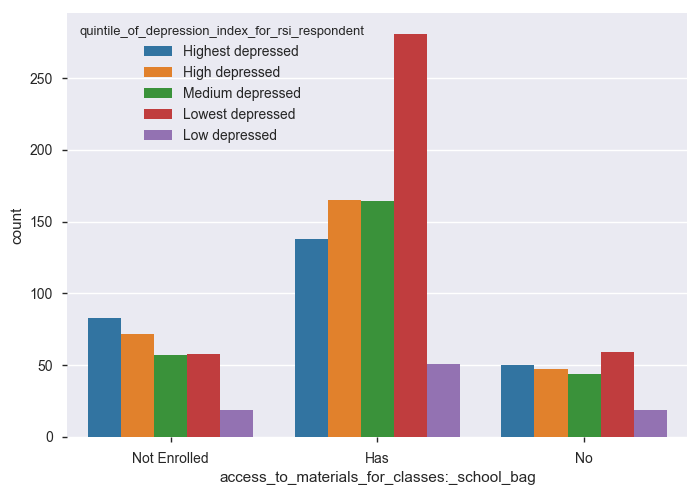

In [656]:
sns.countplot(hue='quintile_of_depression_index_for_rsi_respondent', x='access_to_materials_for_classes:_school_bag', data = df)

In [657]:
pd.crosstab(df['access_to_materials_for_classes:_school_uniform'], [df.quintile_of_depression_index_for_rsi_respondent], normalize='index').style.background_gradient(cmap='magma', low=.5, high=0).highlight_null('red')

quintile_of_depression_index_for_rsi_respondent,High depressed,Highest depressed,Low depressed,Lowest depressed,Medium depressed
access_to_materials_for_classes:_school_uniform,,,,,
Has,0.195722,0.181818,0.0705882,0.342246,0.209626
No,0.345238,0.22619,0.047619,0.238095,0.142857
Not Enrolled,0.25,0.284722,0.0659722,0.201389,0.197917


In [658]:
pd.crosstab(df['access_to_materials_for_classes:_shoes'], [df.quintile_of_depression_index_for_rsi_respondent], normalize='index').style.background_gradient(cmap='magma', low=.5, high=0).highlight_null('red')

quintile_of_depression_index_for_rsi_respondent,High depressed,Highest depressed,Low depressed,Lowest depressed,Medium depressed
access_to_materials_for_classes:_shoes,,,,,
Has,0.201136,0.181818,0.0704545,0.342045,0.204545
No,0.251799,0.208633,0.057554,0.280576,0.201439
Not Enrolled,0.25,0.284722,0.0659722,0.201389,0.197917


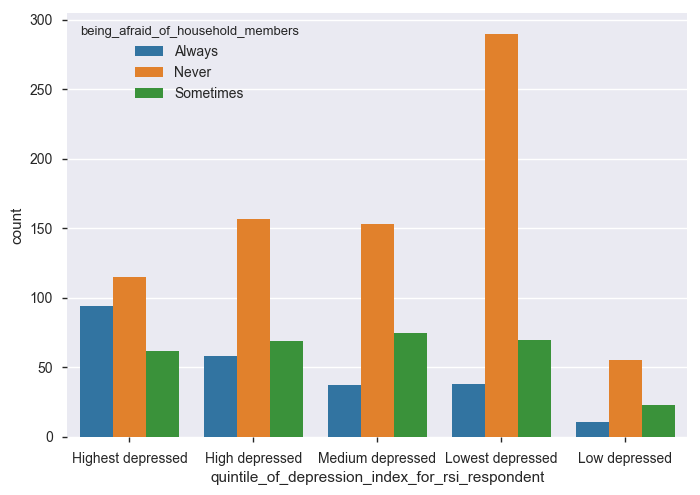

In [659]:
sns.countplot(x='quintile_of_depression_index_for_rsi_respondent', hue='being_afraid_of_household_members', data = df)

In [660]:
pd.crosstab(df.quintile_of_depression_index_for_rsi_respondent, [df.sex_of_rsi_respondent,df.being_afraid_of_household_members,df.wealth_quintiles]).style.background_gradient(cmap='magma', low=.5, high=0).highlight_null('red')

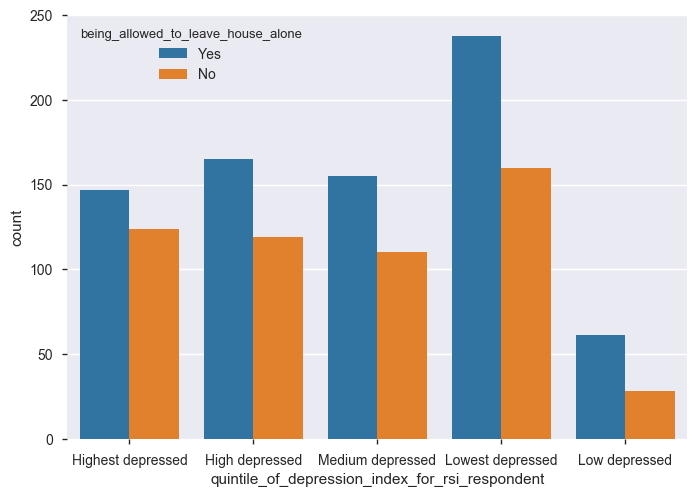

In [661]:
sns.countplot(x='quintile_of_depression_index_for_rsi_respondent', hue='being_allowed_to_leave_house_alone', data = df)

In [662]:
pd.crosstab(df.quintile_of_depression_index_for_rsi_respondent, [df.sex_of_rsi_respondent,df.usually_eat_together_with_other_household_members]).style.background_gradient(cmap='magma', low=.5, high=0).highlight_null('red')

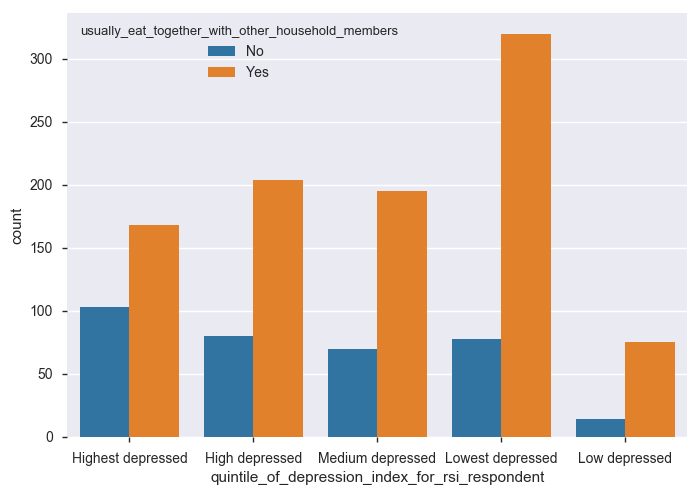

In [663]:
sns.countplot(x='quintile_of_depression_index_for_rsi_respondent', hue='usually_eat_together_with_other_household_members', data = df)

In [664]:
pd.crosstab(df.quintile_of_depression_index_for_rsi_respondent, [df.usually_eat_together_with_other_household_members,df.wealth_quintiles]).style.background_gradient(cmap='magma', low=.5, high=0).highlight_null('red')

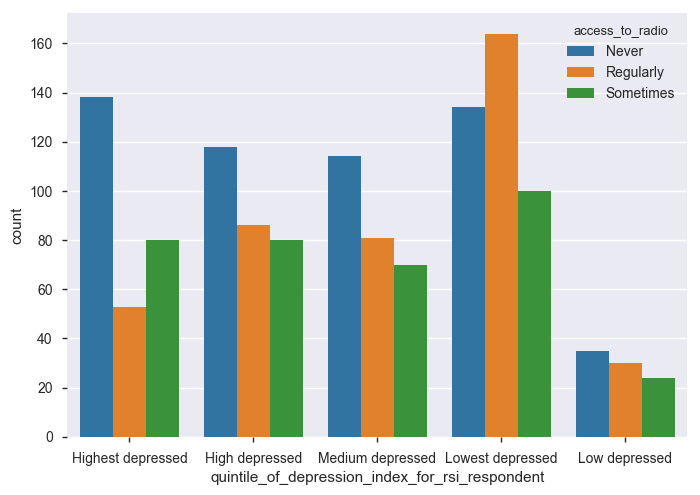

In [665]:
sns.countplot(x='quintile_of_depression_index_for_rsi_respondent', hue='access_to_radio', data = df)

In [666]:
pd.crosstab(df.quintile_of_depression_index_for_rsi_respondent, [df.access_to_radio,df.wealth_quintiles]).style.background_gradient(cmap='magma', low=.5, high=0).highlight_null('red')

In [667]:
pd.crosstab(df.quintile_of_depression_index_for_rsi_respondent, [df.access_to_telephone,df.wealth_quintiles]).style.background_gradient(cmap='magma', low=.5, high=0).highlight_null('red')

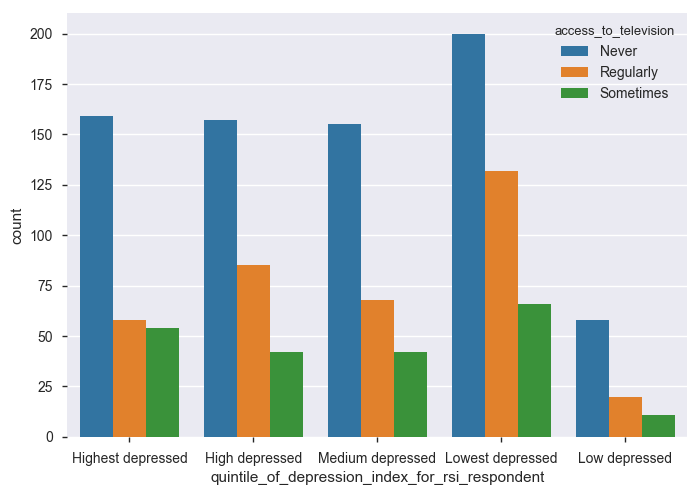

In [668]:
sns.countplot(x='quintile_of_depression_index_for_rsi_respondent', hue='access_to_television', data = df)

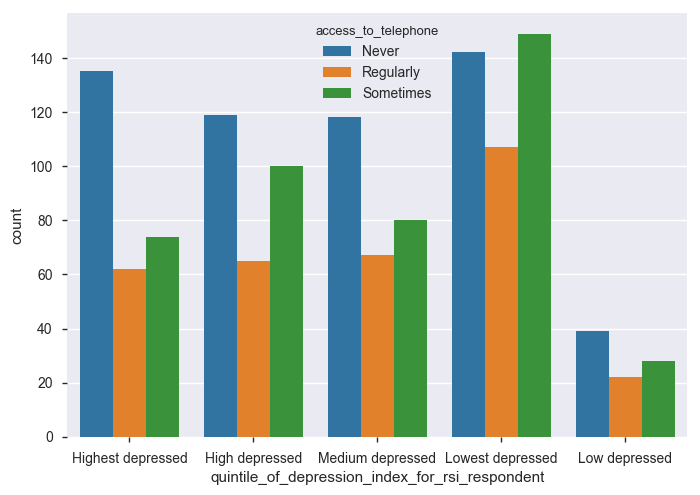

In [669]:
sns.countplot(x='quintile_of_depression_index_for_rsi_respondent', hue='access_to_telephone', data = df)

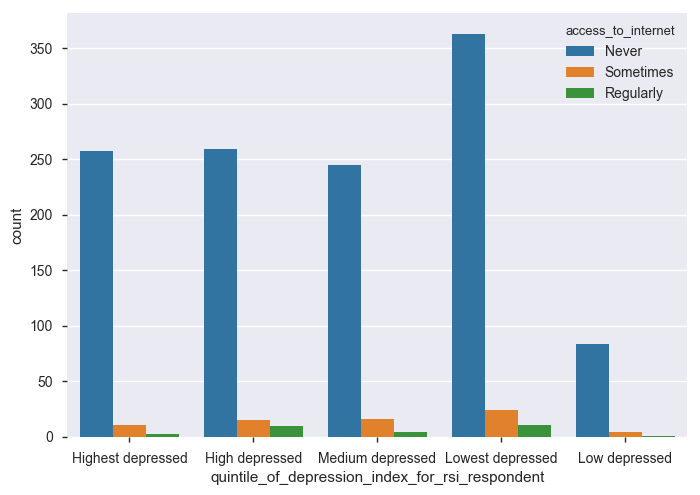

In [670]:
sns.countplot(x='quintile_of_depression_index_for_rsi_respondent', hue='access_to_internet', data = df)

In [671]:
pd.crosstab(df.wealth_quintiles, [df.quintile_of_depression_index_for_rsi_respondent], normalize='index').style.background_gradient(cmap='magma', low=.5, high=0).highlight_null('red')

quintile_of_depression_index_for_rsi_respondent,High depressed,Highest depressed,Low depressed,Lowest depressed,Medium depressed
wealth_quintiles,,,,,
High wealth,0.214286,0.243697,0.0630252,0.306723,0.172269
Highest wealth,0.228956,0.188552,0.0538721,0.323232,0.205387
Low wealth,0.237354,0.190661,0.077821,0.252918,0.241245
Lowest wealth,0.202335,0.194553,0.0583658,0.287938,0.256809
Medium wealth,0.20155,0.224806,0.0891473,0.348837,0.135659


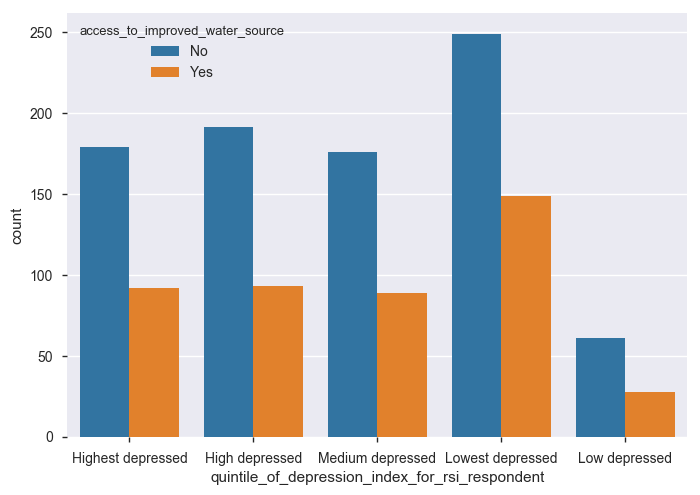

In [672]:
sns.countplot(x='quintile_of_depression_index_for_rsi_respondent', hue='access_to_improved_water_source', data = df)

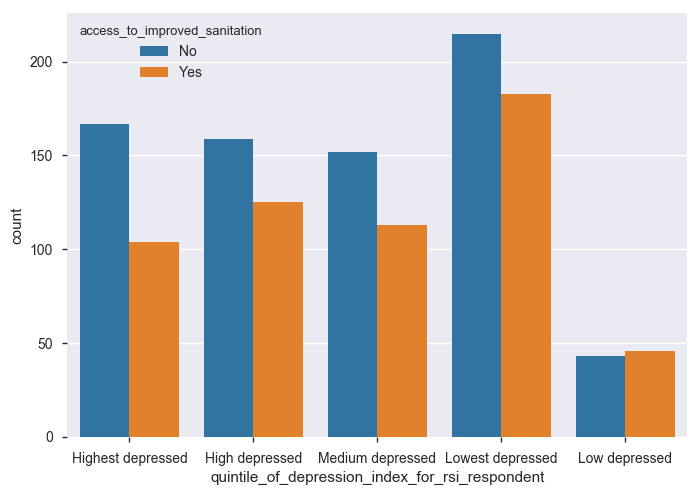

In [673]:
sns.countplot(x='quintile_of_depression_index_for_rsi_respondent', hue='access_to_improved_sanitation', data = df)

In [674]:
pd.crosstab(df.wealth_quintiles, [df.access_to_improved_sanitation, df.quintile_of_depression_index_for_rsi_respondent]).style.background_gradient(cmap='magma', low=.5, high=0).highlight_null('red')

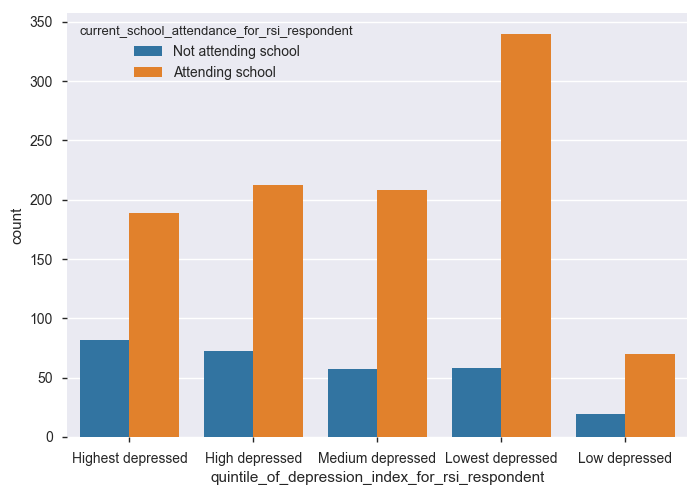

In [675]:
sns.countplot(x='quintile_of_depression_index_for_rsi_respondent', hue='current_school_attendance_for_rsi_respondent', data = df)

In [676]:
pd.crosstab(df.current_school_attendance_for_rsi_respondent, [df.quintile_of_depression_index_for_rsi_respondent, df.sex_of_rsi_respondent], normalize='index').style.background_gradient(cmap='magma', low=.5, high=0).highlight_null('red')

Feature Engineering

In [677]:
df['quintile_of_depression_index_for_rsi_respondent'].value_counts()

Lowest depressed     398
High depressed       284
Highest depressed    271
Medium depressed     265
Low depressed         89
Name: quintile_of_depression_index_for_rsi_respondent, dtype: int64

In [678]:
def depression_level(x):
    if x == 'Lowest depressed':
        return 1
    elif x == 'Low depressed':
        return 2
    elif x == 'Medium depressed':
        return 3
    elif x == 'High depressed':
        return 4
    elif x == 'Highest depressed':
        return 5

In [679]:
df['quintile_of_depression_index_for_rsi_respondent'] = df['quintile_of_depression_index_for_rsi_respondent'].apply(lambda x: depression_level(x))

In [680]:
df['quintile_of_depression_index_for_rsi_respondent'].value_counts()

1    398
4    284
5    271
3    265
2     89
Name: quintile_of_depression_index_for_rsi_respondent, dtype: int64

In [681]:
df = df.drop(['current_school_attendance_for_rsi_respondent'], axis=1)

In [682]:
df2 = df.iloc[:,1:]

In [683]:
ohe = ce.OneHotEncoder(handle_unknown='ignore', use_cat_names=True)
df2 = ohe.fit_transform(df2)
df2.head()

,toilet_facility_Pit latrine with slab,"toilet_facility_Ventilated, build in latrine",toilet_facility_Modern water closet,toilet_facility_Pit latrine without slab/open pit,toilet_facility_No facilities/nature,toilet_facility_Other,privacy_of_toilet_facility_Shared,privacy_of_toilet_facility_Private,food_supply_for_household_members_Just enough,food_supply_for_household_members_Less than enough,...,wealth_quintiles_Medium wealth,wealth_quintiles_Highest wealth,wealth_quintiles_Low wealth,wealth_quintiles_Lowest wealth,access_to_improved_water_source_No,access_to_improved_water_source_Yes,access_to_improved_sanitation_No,access_to_improved_sanitation_Yes,age_of_rsi_respondent,quintile_of_depression_index_for_rsi_respondent
0,1,0,0,0,0,0,1,0,1,0,...,0,0,0,0,1,0,1,0,17.0,5
1,0,1,0,0,0,0,1,0,0,1,...,1,0,0,0,0,1,0,1,15.0,4
2,0,0,1,0,0,0,0,1,1,0,...,0,1,0,0,1,0,0,1,17.0,3
5,1,0,0,0,0,0,1,0,0,1,...,0,1,0,0,1,0,1,0,14.0,3
6,0,1,0,0,0,0,1,0,0,1,...,0,1,0,0,1,0,0,1,8.0,4


In [685]:
focus_col = ['quintile_of_depression_index_for_rsi_respondent']
corr = df2.corr().filter(focus_col).drop(focus_col)
corr['quintile_of_depression_index_for_rsi_respondent'] = corr['quintile_of_depression_index_for_rsi_respondent'].apply(lambda x: abs(x))
corr = corr.sort_values(by=['quintile_of_depression_index_for_rsi_respondent'],ascending=False)
corr

,quintile_of_depression_index_for_rsi_respondent
being_afraid_of_household_members_Always,0.220427
being_afraid_of_household_members_Never,0.217214
access_to_materials_for_classes:_pencils_Has,0.195969
access_to_text_books_for_classes_Access to all books,0.189769
access_to_materials_for_classes:_notebooks_Has,0.177755
work_in_household_after_8_pm_or_before_6_am_Never,0.172576
access_to_radio_Regularly,0.158694
access_to_materials_for_classes:_school_uniform_Has,0.156369
age_of_rsi_respondent,0.155643
food_supply_for_household_members_Just enough,0.153670


In [686]:
corr1 = corr[corr['quintile_of_depression_index_for_rsi_respondent']>=.15]
corr1 = corr1.iloc[:,1:]
corr1 = corr1.reset_index()
corr2 = []
for x in corr1['index']:
    corr2.append(x)
    
corr2

['being_afraid_of_household_members_Always',
 'being_afraid_of_household_members_Never',
 'access_to_materials_for_classes:_pencils_Has',
 'access_to_text_books_for_classes_Access to all books',
 'access_to_materials_for_classes:_notebooks_Has',
 'work_in_household_after_8_pm_or_before_6_am_Never',
 'access_to_radio_Regularly',
 'access_to_materials_for_classes:_school_uniform_Has',
 'age_of_rsi_respondent',
 'food_supply_for_household_members_Just enough',
 'access_to_materials_for_classes:_eraser_Has',
 'food_supply_for_household_members_Less than enough']

In [688]:
df_final = df2[['being_afraid_of_household_members_Always',
 'being_afraid_of_household_members_Never',
 'access_to_materials_for_classes:_pencils_Has',
 'access_to_text_books_for_classes_Access to all books',
 'access_to_materials_for_classes:_notebooks_Has',
 'work_in_household_after_8_pm_or_before_6_am_Never',
 'access_to_radio_Regularly',
 'access_to_materials_for_classes:_school_uniform_Has',
 'age_of_rsi_respondent',
 'food_supply_for_household_members_Just enough',
 'access_to_materials_for_classes:_eraser_Has',
 'food_supply_for_household_members_Less than enough', 'quintile_of_depression_index_for_rsi_respondent']]

In [689]:
X = df_final.iloc[:,:12]
Y = df_final.iloc[:,12:]

In [690]:
X.head()

,being_afraid_of_household_members_Always,being_afraid_of_household_members_Never,access_to_materials_for_classes:_pencils_Has,access_to_text_books_for_classes_Access to all books,access_to_materials_for_classes:_notebooks_Has,work_in_household_after_8_pm_or_before_6_am_Never,access_to_radio_Regularly,access_to_materials_for_classes:_school_uniform_Has,age_of_rsi_respondent,food_supply_for_household_members_Just enough,access_to_materials_for_classes:_eraser_Has,food_supply_for_household_members_Less than enough
0,1,0,0,0,0,1,0,0,17.0,1,0,0
1,0,1,1,1,1,1,1,1,15.0,0,1,1
2,0,0,1,1,1,1,0,1,17.0,1,1,0
5,0,0,1,0,1,1,0,1,14.0,0,1,1
6,1,0,1,0,1,1,0,1,8.0,0,1,1


In [691]:
Y.head()

,quintile_of_depression_index_for_rsi_respondent
0,5
1,4
2,3
5,3
6,4


Modeling

Linear Regression

In [692]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [693]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)

In [694]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [696]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

In [697]:
scores = cross_val_score(regressor, X, Y, cv=9, scoring='neg_mean_squared_error')
print ('Cross-validated aversge:', scores.mean())

Cross-validated aversge: -2.01018203702


In [698]:
column_labels = X.columns.tolist()
coef = regressor.coef_.squeeze().tolist()
labels_coef = list(zip(column_labels, coef))
labels_coef.sort(key=lambda x: abs(x[1]), reverse=True)
labels_coef = pd.DataFrame(labels_coef)
labels_coef = labels_coef.rename(columns={labels_coef.columns[0]: 'Feature'})
labels_coef = labels_coef.rename(columns={labels_coef.columns[1]: 'Coefficient'})
labels_coef

,Feature,Coefficient
0,age_of_rsi_respondent,0.162311
1,being_afraid_of_household_members_Always,0.146403
2,being_afraid_of_household_members_Never,-0.110092
3,access_to_radio_Regularly,-0.089272
4,access_to_text_books_for_classes_Access to all...,-0.087105
5,work_in_household_after_8_pm_or_before_6_am_Never,-0.085355
6,access_to_materials_for_classes:_notebooks_Has,-0.074254
7,food_supply_for_household_members_Just enough,-0.069500
8,access_to_materials_for_classes:_pencils_Has,-0.049637
9,access_to_materials_for_classes:_school_unifor...,0.018967


Support Vector Regression

In [699]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [700]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)

In [701]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'linear')
regressor.fit(X, Y)

/Users/andrewmurphy/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [703]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

In [704]:
scores = cross_val_score(regressor, X, Y, cv=9, scoring='neg_mean_squared_error')
print ('Cross-validated average:', scores.mean())

/Users/andrewmurphy/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andrewmurphy/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andrewmurphy/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andrewmurphy/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was e

Cross-validated average: -2.13378671677


/Users/andrewmurphy/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [705]:
column_labels = X.columns.tolist()
coef = regressor.coef_.squeeze().tolist()
labels_coef = list(zip(column_labels, coef))
labels_coef.sort(key=lambda x: abs(x[1]), reverse=True)
labels_coef = pd.DataFrame(labels_coef)
labels_coef = labels_coef.rename(columns={labels_coef.columns[0]: 'Feature'})
labels_coef = labels_coef.rename(columns={labels_coef.columns[1]: 'Coefficient'})
labels_coef

,Feature,Coefficient
0,being_afraid_of_household_members_Always,0.765890
1,access_to_text_books_for_classes_Access to all...,-0.733475
2,being_afraid_of_household_members_Never,-0.528014
3,work_in_household_after_8_pm_or_before_6_am_Never,-0.466354
4,access_to_radio_Regularly,-0.450421
5,access_to_materials_for_classes:_pencils_Has,-0.418254
6,access_to_materials_for_classes:_notebooks_Has,-0.392827
7,access_to_materials_for_classes:_eraser_Has,0.277982
8,food_supply_for_household_members_Just enough,-0.252760
9,access_to_materials_for_classes:_school_unifor...,0.172748


In [706]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [707]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)

In [708]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, Y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=0,
           splitter='best')

In [709]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

In [710]:
scores = cross_val_score(regressor, X, Y, cv=9, scoring='neg_mean_squared_error')
print ('Cross-validated average:', scores.mean())

Cross-validated average: -3.32657361897


In [711]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [712]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)

In [713]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X, Y)

/Users/andrewmurphy/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [715]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

In [716]:
scores = cross_val_score(regressor, X, Y, cv=9, scoring='neg_mean_squared_error')
print ('Cross-validated average:', scores.mean())

/Users/andrewmurphy/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:1665: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/andrewmurphy/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:1665: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/andrewmurphy/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:1665: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/andrewmurphy/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:1665: DataConversionWarning: A co

Cross-validated average: -2.63598229804


/Users/andrewmurphy/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:1665: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


XGBoost Regression

In [717]:
import xgboost as xgb

In [718]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [719]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)

In [720]:
xgb = xgb.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

In [721]:
traindf, testdf = train_test_split(X_train, test_size = 0.3)
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.08, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.75)

In [722]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

In [723]:
scores = cross_val_score(xgb, X, Y, cv=9, scoring='neg_mean_squared_error')
print ('Cross-validated aversge:', scores.mean())

Cross-validated aversge: -2.54256395864


Conclusions